In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [2]:
def f_1_1_0():
    f = QuantumCircuit(2)
    return f

def f_1_1_1():
    f = QuantumCircuit(2)
    f.cx(0, 1)
    return f

oracle = f_1_1_1()

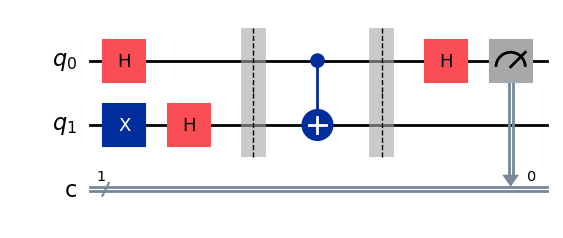

In [3]:
from quantum.algorithms.deutsch import build_circuit
qc = build_circuit(oracle)
qc.draw(output="mpl")

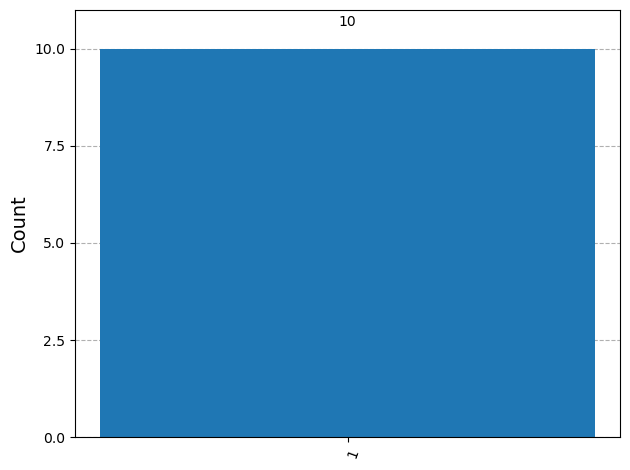

In [4]:
from qiskit.visualization import plot_histogram

result = AerSimulator().run(qc, shots=10, memory=True).result()
counts = result.get_counts()
plot_histogram(counts)